In [76]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pltm
import seaborn as plot_sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score

In [77]:
# Load the data
onlin_shp_df_1 = pd.read_csv('online_shoppers_intention.csv')

In [78]:
onlin_shp_df_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [79]:
# onlin_shp_df_1 Pre-processing
onlin_shp_df_1 = onlin_shp_df_1.replace('?', numpy.nan)  # Replace missing values with NaN
onlin_shp_df_1 = onlin_shp_df_1.dropna()  # Remove rows with missing values

In [80]:
# Convert categorical variables to numerical using LabelEncoder
categorical_clnms = ['Month', 'VisitorType', 'Weekend', 'Revenue']
for clnm in categorical_clnms:
    l_e1 = LabelEncoder()
    onlin_shp_df_1[clnm] = l_e1.fit_transform(onlin_shp_df_1[clnm])

In [81]:
# Normalize numerical features
numerical_clnms = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
scaler = StandardScaler()
onlin_shp_df_1[numerical_clnms] = scaler.fit_transform(onlin_shp_df_1[numerical_clnms])

In [82]:
# Feature Selection and Extraction
ip_attrin = onlin_shp_df_1.drop('Revenue', axis=1)
targt_in = onlin_shp_df_1['Revenue']

In [83]:
# Perform feature extraction using PCA
pca = PCA(n_components=2)
ip_attrin_pca = pca.fit_transform(ip_attrin)

**Classification Techniques**

In [84]:
ip_attrin_tr, ip_attrin_tst, targt_in_tr, targt_in_tst = train_test_split(ip_attrin, targt_in, test_size=0.2, random_state=42)

In [85]:
# Decision Tree Classifier
dtmdll = DecisionTreeClassifier()

# Define the hyperparameter grid for decision tree
dt_PGrd = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Perform grid search to find the best hyperparameters
dtGS_cv = GridSearchCV(dtmdll, dt_PGrd, scoring='accuracy', cv=5)
dtGS_cv.fit(ip_attrin_tr, targt_in_tr)
dt_bestmdll = dtGS_cv.best_estimator_
dtprd_out = dt_bestmdll.predict(ip_attrin_tst)

In [86]:
# Random Forest Classifier
rfmdll = RandomForestClassifier()

# Define the hyperparameter grid for random forest
rf_PGrd = {
    'n_estimators': [100, 200, 500]
}

# Perform grid search to find the best hyperparameters
rfGS_cv = GridSearchCV(rfmdll, rf_PGrd, scoring='accuracy', cv=5)
rfGS_cv.fit(ip_attrin_tr, targt_in_tr)
rf_bestmdll = rfGS_cv.best_estimator_
rfprd_out = rf_bestmdll.predict(ip_attrin_tst)

In [87]:
# Support Vector Machine (SVM) Classifier
svmmdll = SVC()

# Define the hyperparameter grid for SVM
svm_PGrd = {
    'C': [0.1, 1, 10]
}

# Perform grid search to find the best hyperparameters
svmGS_cv = GridSearchCV(svmmdll, svm_PGrd, scoring='accuracy', cv=5)
svmGS_cv.fit(ip_attrin_tr, targt_in_tr)
svm_bestmdll = svmGS_cv.best_estimator_
svmprd_out = svm_bestmdll.predict(ip_attrin_tst)

In [60]:
# Classification Report
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(targt_in_tst, dtprd_out))

print("Random Forest Classification Report:")
print(classification_report(targt_in_tst, rfprd_out))

print("SVM Classification Report:")
print(classification_report(targt_in_tst, svmprd_out))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.74      0.50      0.60       411

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.73      0.51      0.60       411

    accuracy                           0.89      2466
   macro avg       0.82    

**# Visualization**

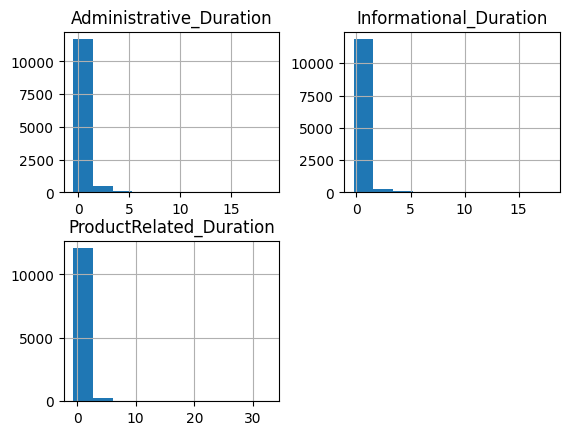

In [61]:
# Histograms
onlin_shp_df_1[numerical_clnms].hist()
pltm.show()


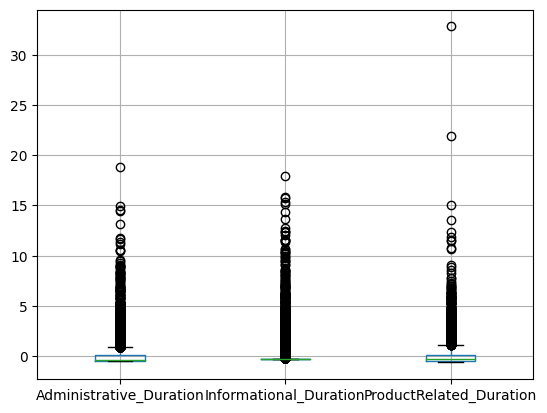

In [62]:
# Box Plots
onlin_shp_df_1[numerical_clnms].boxplot()
pltm.show()

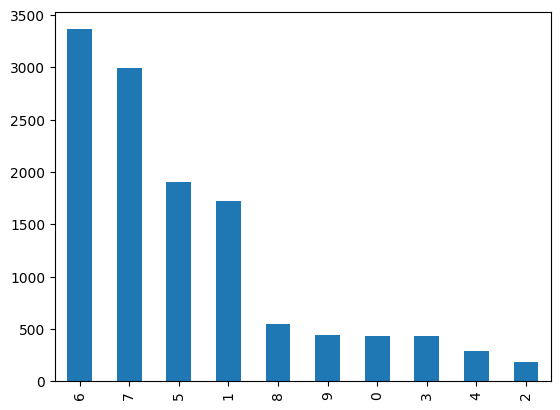

In [63]:
# Bar Charts
onlin_shp_df_1['Month'].value_counts().plot(kind='bar')
pltm.show()

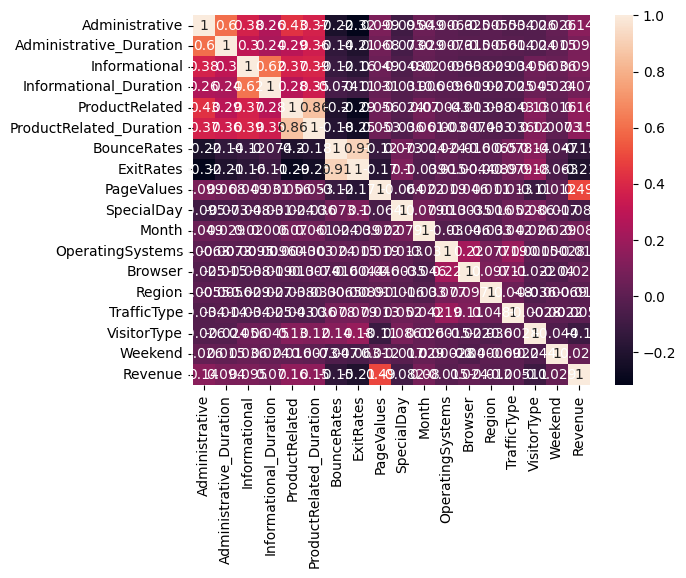

In [64]:
# Correlation Heatmap
corr_matrix = onlin_shp_df_1.corr()
plot_sns.heatmap(corr_matrix, annot=True)
pltm.show()

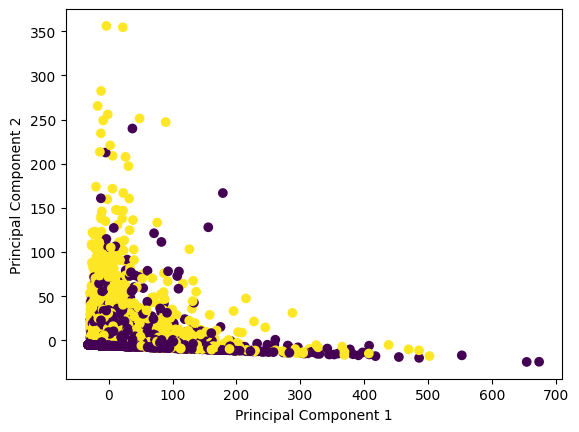

In [65]:
# Scatter Plot
pltm.scatter(ip_attrin_pca[:, 0], ip_attrin_pca[:, 1], c=targt_in)
pltm.xlabel('Principal Component 1')
pltm.ylabel('Principal Component 2')
pltm.show()

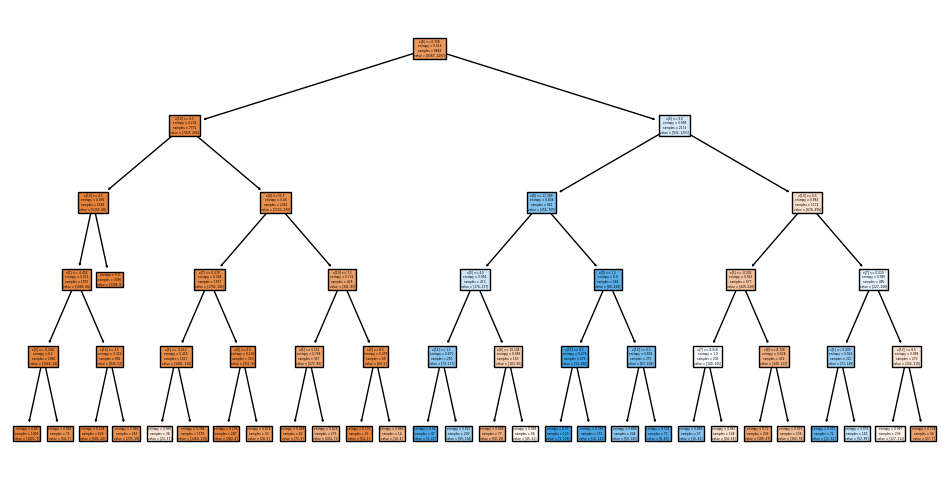

In [66]:
# Decision Tree Visualization
from sklearn import tree
pltm.figure(figsize=(12, 6))
tree.plot_tree(dt_bestmdll, filled=True)
pltm.show()

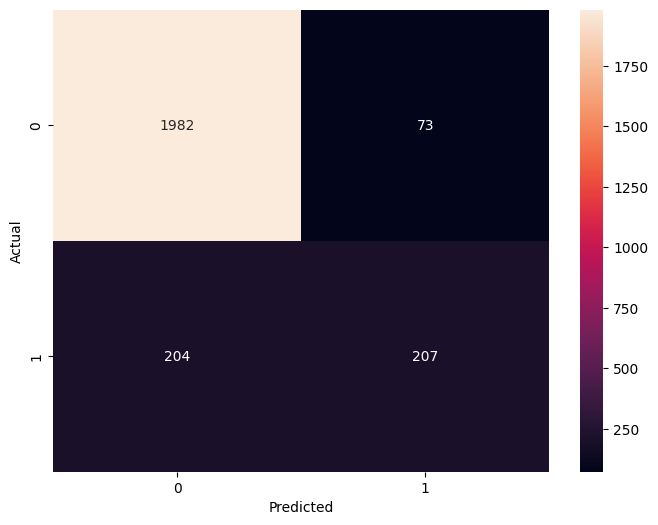

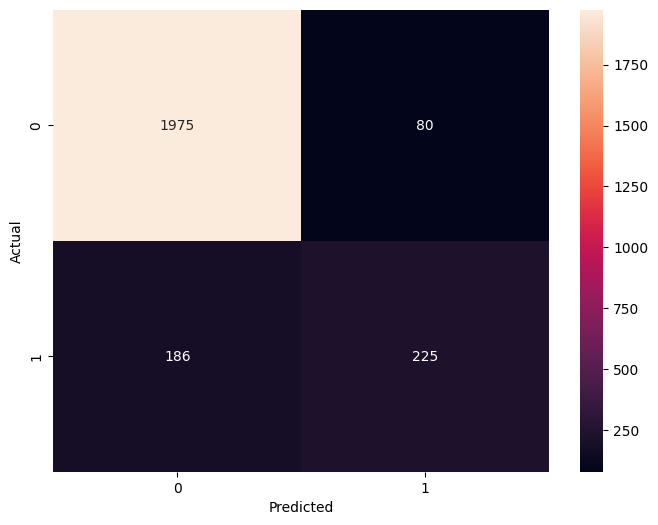

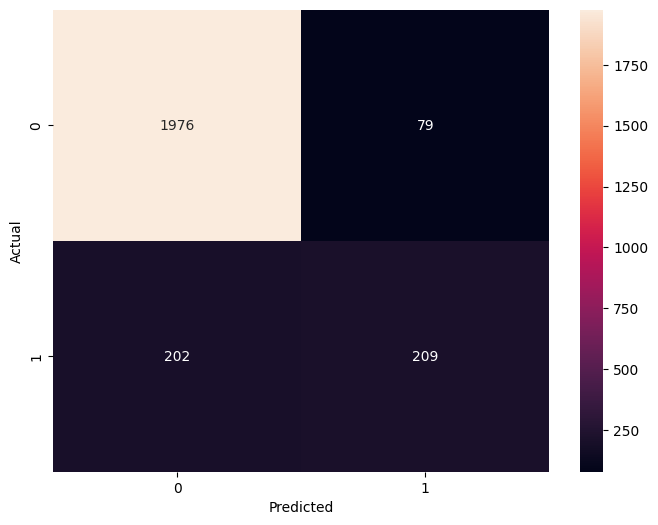

In [67]:
# Confusion Matrix
def plot_confusion_matrix(targt_in_true, targt_pred):
    cm = confusion_matrix(targt_in_true, targt_pred)
    pltm.figure(figsize=(8, 6))
    plot_sns.heatmap(cm, annot=True, fmt='d')
    pltm.xlabel('Predicted')
    pltm.ylabel('Actual')
    pltm.show()

plot_confusion_matrix(targt_in_tst, dtprd_out)
plot_confusion_matrix(targt_in_tst, rfprd_out)
plot_confusion_matrix(targt_in_tst, svmprd_out)

In [68]:
def plot_roc_curve(targt_in_true, targt_score, label):
    fpr, tpr, thresholds = roc_curve(targt_in_true, targt_score)
    auc_score = roc_auc_score(targt_in_true, targt_score)
    pltm.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (label, auc_score))

In [69]:
# Compute predicted probabilities for ROC curve
dt_probabilities = dt_bestmdll.predict_proba(ip_attrin_tst)[:, 1]
rf_probabilities = rf_bestmdll.predict_proba(ip_attrin_tst)[:, 1]
svm_probabilities = svm_bestmdll.decision_function(ip_attrin_tst)

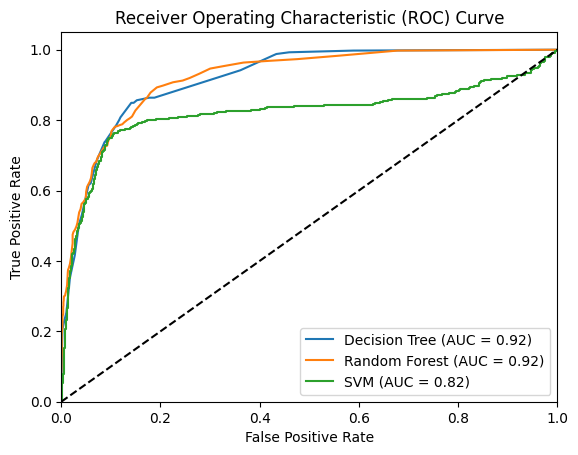

In [70]:
# Plot ROC curve for each classifier
pltm.figure()
plot_roc_curve(targt_in_tst, dt_probabilities, 'Decision Tree')
plot_roc_curve(targt_in_tst, rf_probabilities, 'Random Forest')
plot_roc_curve(targt_in_tst, svm_probabilities, 'SVM')
pltm.plot([0, 1], [0, 1], 'k--')  # Random guess line
pltm.xlim([0.0, 1.0])
pltm.ylim([0.0, 1.05])
pltm.xlabel('False Positive Rate')
pltm.ylabel('True Positive Rate')
pltm.title('Receiver Operating Characteristic (ROC) Curve')
pltm.legend(loc="lower right")
pltm.show()

In [71]:
# F1 Score
dt_f1 = f1_score(targt_in_tst, dtprd_out)
rf_f1 = f1_score(targt_in_tst, rfprd_out)
svm_f1 = f1_score(targt_in_tst, svmprd_out)

# Print F1 scores
print("Decision Tree F1 Score:", dt_f1)
print("Random Forest F1 Score:", rf_f1)
print("SVM F1 Score:", svm_f1)

Decision Tree F1 Score: 0.5991316931982634
Random Forest F1 Score: 0.6284916201117319
SVM F1 Score: 0.597997138769671


In [72]:
# Classification Report
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(targt_in_tst, dtprd_out))

print("Random Forest Classification Report:")
print(classification_report(targt_in_tst, rfprd_out))

print("SVM Classification Report:")
print(classification_report(targt_in_tst, svmprd_out))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.74      0.50      0.60       411

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.73      0.51      0.60       411

    accuracy                           0.89      2466
   macro avg       0.82    